In [3]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

# View first 10 rows
X.head(5)

X.tail(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


In [8]:
from sklearn.model_selection import train_test_split

# Split before feature selection to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)


In [9]:
# #without feature selection

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Train on all features
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Evaluate
# y_pred = model.predict(X_test)
# print("Baseline Model Performance (All Features):")
# print("R^2 Score:", r2_score(y_test, y_pred))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


In [10]:
# #SELECT_K_BEST

# from sklearn.feature_selection import SelectKBest, f_regression

# # Feature selection
# selector = SelectKBest(score_func=f_regression, k=6)
# X_train_kbest = selector.fit_transform(X_train, y_train)
# X_test_kbest = selector.transform(X_test)

# # Train and evaluate
# model_kbest = LinearRegression()
# model_kbest.fit(X_train_kbest, y_train)
# y_pred_kbest = model_kbest.predict(X_test_kbest)

# selected_features_kbest = X.columns[selector.get_support()]
# print("\nSelectKBest Selected Features:", list(selected_features_kbest))
# print("Model Performance (SelectKBest):")
# print("R^2 Score:", r2_score(y_test, y_pred_kbest))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_kbest)))


In [11]:
#REGRESSIVE_FEATURE_ELIMINATION
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

#scaling to improve accuracy

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rfe)
X_test_scaled = scaler.transform(X_test_rfe)

model_rfe = LinearRegression()
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)

selected_features_rfe = X.columns[rfe.support_]
print("\nRFE Selected Features:", list(selected_features_rfe))
print("Model Performance (RFE):")
print("R^2 Score:", r2_score(y_test, y_pred_rfe))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rfe)))



RFE Selected Features: ['sex', 'bmi', 'bp', 's1', 's2', 's5']
Model Performance (RFE):
R^2 Score: 0.5711757051037248
RMSE: 43.07708406189691


In [12]:
# #LASSOCV [ AUTOMATIC SELECTION ]

# from sklearn.linear_model import LassoCV

# lasso = LassoCV(cv=5)
# lasso.fit(X_train, y_train)

# selected_features_lasso = X.columns[lasso.coef_ != 0]
# X_train_lasso = X_train[selected_features_lasso]
# X_test_lasso = X_test[selected_features_lasso]

# model_lasso = LinearRegression()
# model_lasso.fit(X_train_lasso, y_train)
# y_pred_lasso = model_lasso.predict(X_test_lasso)

# print("\nLasso Selected Features:", list(selected_features_lasso))
# print("Model Performance (Lasso):")
# print("R^2 Score:", r2_score(y_test, y_pred_lasso))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


In [13]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet,LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

models = {
    "Linear Regression" : LinearRegression(),
    "Logistic Regresssion" : LogisticRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    # Use scaled inputs where needed
    X_train_final = X_train_scaled if name != "Random Forest" else X_train_rfe
    X_test_final = X_test_scaled if name != "Random Forest" else X_test_rfe
    
    # Train and predict
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    
    # Evaluate
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"\n{name} Performance:")
    print("R^2 Score:", round(r2, 4))
    print("RMSE:", round(rmse, 4))


# import matplotlib.pyplot as plt

# # Dictionaries to store performance
# r2_scores = {}
# rmse_scores = {}

# for name, model in models.items():
#     # Use scaled inputs for all except Random Forest
#     X_train_final = X_train_scaled if name != "Random Forest" else X_train_rfe
#     X_test_final = X_test_scaled if name != "Random Forest" else X_test_rfe

#     # Train and predict
#     model.fit(X_train_final, y_train)
#     y_pred = model.predict(X_test_final)

#     # Evaluate
#     r2 = r2_score(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#     r2_scores[name] = r2
#     rmse_scores[name] = rmse

#     print(f"\n{name} Performance:")
#     print("R^2 Score:", round(r2, 4))
#     print("RMSE:", round(rmse, 4))

# # Plotting
# model_names = list(r2_scores.keys())
# r2_vals = list(r2_scores.values())
# rmse_vals = list(rmse_scores.values())

# x = np.arange(len(model_names))
# width = 0.35

# fig, ax1 = plt.subplots(figsize=(12, 6))
# bar1 = ax1.bar(x - width/2, r2_vals, width, label='R² Score', color='skyblue')
# bar2 = ax1.bar(x + width/2, rmse_vals, width, label='RMSE', color='salmon')

# # Labels and formatting
# ax1.set_xlabel('Models')
# ax1.set_title('Model Comparison: R² Score and RMSE')
# ax1.set_xticks(x)
# ax1.set_xticklabels(model_names, rotation=45)
# ax1.legend()
# ax1.grid(True, linestyle='--', alpha=0.6)

# # Annotate values
# for bar in bar1 + bar2:
#     height = bar.get_height()
#     ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
#                  xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

# plt.tight_layout()
# plt.show()



Linear Regression Performance:
R^2 Score: 0.5712
RMSE: 43.0771

Logistic Regresssion Performance:
R^2 Score: 0.0901
RMSE: 62.7476

Ridge Performance:
R^2 Score: 0.5707
RMSE: 43.1031

Lasso Performance:
R^2 Score: 0.5546
RMSE: 43.9035

ElasticNet Performance:
R^2 Score: 0.49
RMSE: 46.9783

SVR Performance:
R^2 Score: 0.1956
RMSE: 58.9978

Random Forest Performance:
R^2 Score: 0.525
RMSE: 45.3385


In [14]:
from sklearn.decomposition import PCA

# Scale full X
scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(X)

# Split (preserving original split behavior)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_scaled, y, test_size=0.1, random_state=45)

# Apply PCA (keep enough components to explain ~95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

print("PCA Components Selected:", pca.n_components_)


PCA Components Selected: 8


In [15]:
# # Reuse best model: Linear Regression
# model_pca = LinearRegression()
# model_pca.fit(X_train_pca, y_train_pca)
# y_pred_pca = model_pca.predict(X_test_pca)

# # Evaluate
# r2_pca = r2_score(y_test_pca, y_pred_pca)
# rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))

# print("PCA + Linear Regression Performance:")
# print("R^2 Score:", round(r2_pca, 4))
# print("RMSE:", round(rmse_pca, 4))


In [16]:
# print("\n📊 Performance Summary:")
# print("RFE + Linear Regression: R^2 = 0.5712, RMSE = 43.0771")
# print(f"PCA + Linear Regression: R^2 = {round(r2_pca, 4)}, RMSE = {round(rmse_pca, 4)}")


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=6, scoring='r2')
print("Average R² across folds:", scores.mean())


Average R² across folds: 0.4797786512010009



Linear Regression Performance:
R^2 Score: 0.5712
RMSE: 43.0771

Logistic Regresssion Performance:
R^2 Score: 0.0901
RMSE: 62.7476

Ridge Performance:
R^2 Score: 0.5707
RMSE: 43.1031

Lasso Performance:
R^2 Score: 0.5546
RMSE: 43.9035

ElasticNet Performance:
R^2 Score: 0.49
RMSE: 46.9783

SVR Performance:
R^2 Score: 0.1956
RMSE: 58.9978

Random Forest Performance:
R^2 Score: 0.5048
RMSE: 46.2893


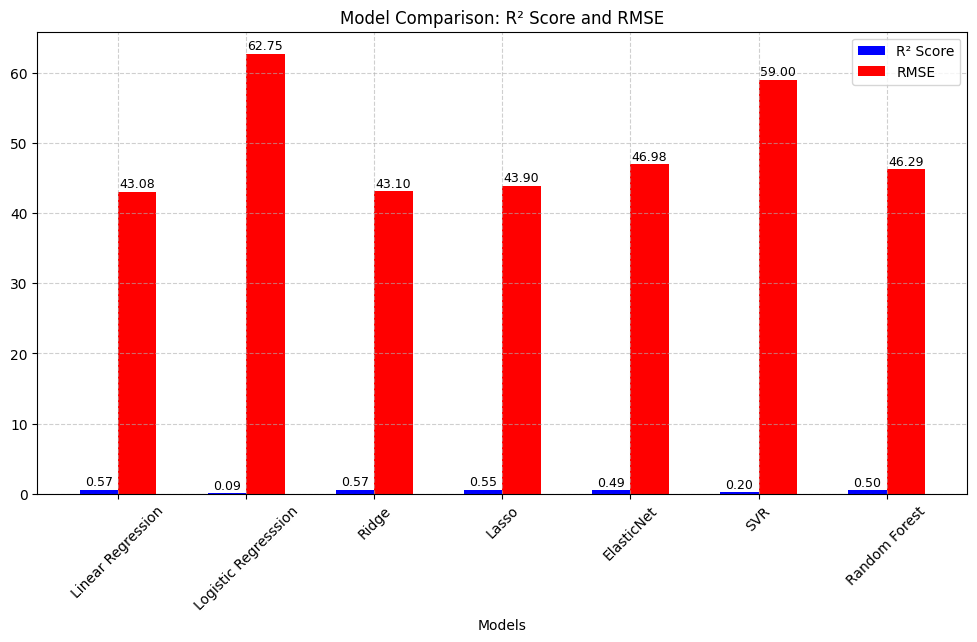

In [27]:
import matplotlib.pyplot as plt

# Dictionaries to store performance
r2_scores = {}
rmse_scores = {}

# all models defined in cell 13

for name, model in models.items():
    # Use scaled inputs for all except Random Forest
    X_train_final = X_train_scaled if name != "Random Forest" else X_train_rfe
    X_test_final = X_test_scaled if name != "Random Forest" else X_test_rfe

    #fit on train and (x,y)train only 
    
    #test y_pred on x_test
 
    # Train and predict
    
    model.fit(X_train_final, y_train)

    y_pred = model.predict(X_test_final)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    r2_scores[name] = r2
    rmse_scores[name] = rmse

    print(f"\n{name} Performance:")
    print("R^2 Score:", round(r2, 4))
    print("RMSE:", round(rmse, 4))

# Plotting
model_names = list(r2_scores.keys()) #name of models
r2_vals = list(r2_scores.values()) # r2 of models
rmse_vals = list(rmse_scores.values()) #rsme of models

x = np.arange(len(model_names))
width = 0.3 #spacing between names in graph

fig, ax1 = plt.subplots(figsize=(12, 6))
bar1 = ax1.bar(x - width/2, r2_vals, width, label='R² Score', color='blue')#for r2
bar2 = ax1.bar(x + width/2, rmse_vals, width, label='RMSE', color='red')#for rmse

# Labels and formatting
ax1.set_xlabel('Models')
ax1.set_title('Model Comparison: R² Score and RMSE')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# Annotate values
for bar in bar1 + bar2:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

# plt.tight_layout()
plt.show()


In [4]:
# Fig. 3.5.1: Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features scaled successfully!")
print(f"Mean after scaling: {X_scaled.mean(axis=0)}")
print(f"Std after scaling: {X_scaled.std(axis=0)}")

Features scaled successfully!
Mean after scaling: [-8.03781375e-18  1.22074296e-16  6.53072367e-18 -1.14538846e-16
  5.52599696e-18 -6.53072367e-18 -1.10519939e-17  1.27349112e-16
  8.60297253e-18 -7.20577444e-17]
Std after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
# Fig. 4.1.1: Linear Regression Model Fit
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression Model trained successfully!")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

NameError: name 'LinearRegression' is not defined